<h1 align="center"> Assignment 1 </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Q1 and Q2

The `data_gen` function generates the random data and the `linear_regression` function does the Linear Regression

In [2]:
def data_gen(m, n, sigma) :

    data = np.concatenate((np.ones((n,1)), np.random.random((n, m-1))), axis=1)

    beta = np.random.random((m, 1))
    e = np.random.normal(0, sigma, (n, 1))
    y = np.matmul(data, beta) + e

    return data, beta, y


def linear_regression(m, n, sigma, k, t, l):

    data, beta, y = data_gen(m, n, sigma)
    beta_pred = np.random.random((m, 1))

    cost_previous = 0
    itr = 0

    for i in range(k):
        ypred = np.matmul(data, beta_pred)
        beta_pred = beta_pred - ((l/n) * np.matmul(data.T, (ypred - y)))
        cost_current = np.mean((ypred - y)**2)
        if abs(cost_current - cost_previous) < t : break
        cost_previous = cost_current
        itr += 1
    
    return data, y, beta, itr, beta_pred, cost_current


m = 5
n = 7
sigma = 0.5
k = 1000000
t = 0.0000001
l = 0.001

data, y, beta, itr, beta_pred, cost_current = linear_regression(m, n, sigma, k, t, l)

print("\nX:\n", data)
print("\nY:\n", y)
print("\nβ (original):\n", beta)
print("\nβ (estimated):\n", beta_pred)
print(f"\nIt took {itr} iterations and cost is {cost_current}\n")


X:
 [[1.         0.98251682 0.19100801 0.10514542 0.22184089]
 [1.         0.02204162 0.87719652 0.12061971 0.98925847]
 [1.         0.80816053 0.35207134 0.13244839 0.50926098]
 [1.         0.01671003 0.85758378 0.41306488 0.7130395 ]
 [1.         0.1665252  0.59213871 0.97283103 0.36359308]
 [1.         0.82684501 0.21370719 0.6209855  0.23825628]
 [1.         0.8467852  0.28865044 0.06318201 0.07784151]]

Y:
 [[0.26572779]
 [0.76396802]
 [1.14982667]
 [0.71368197]
 [1.48827543]
 [1.29628367]
 [0.32282422]]

β (original):
 [[8.19038448e-04]
 [3.76710393e-01]
 [4.20611064e-01]
 [8.27389916e-01]
 [2.69580726e-01]]

β (estimated):
 [[-0.35196553]
 [ 0.60534418]
 [-0.1072811 ]
 [ 1.43238896]
 [ 1.01018679]]

It took 113686 iterations and cost is 0.037318896251224636



# Q3

I have plotted `n` vs `σ` vs MSE. It can be clearly seen that as the number of samples decrease and as the standard deviation increases, the MSE increases.

With too few samples, the model does not have enough information to learn the underlying pattern at all and noise due to the gaussian random variable even worsens this problem. So the model is underfitted and it will perform poorly even on the training data.

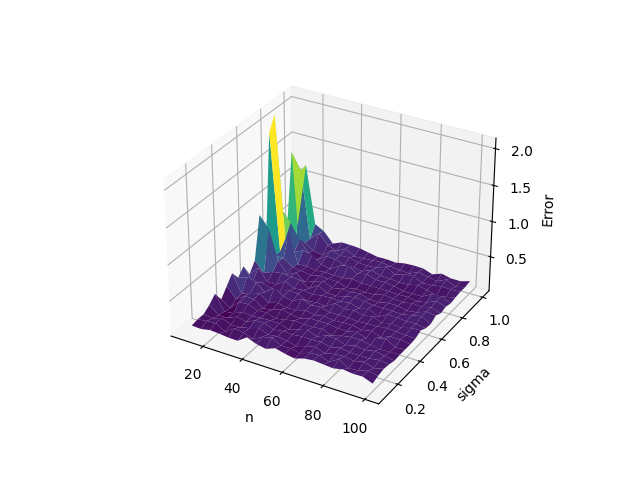

In [3]:
%matplotlib widget

n_values = np.linspace(10, 100, 20)
sigma_values = np.linspace(0.1, 1, 20)
n_values, sigma_values = np.meshgrid(n_values, sigma_values)

errors = np.zeros_like(n_values)

for i in range(n_values.shape[0]):
    for j in range(n_values.shape[1]):
        n = int(n_values[i, j])
        sigma = sigma_values[i, j]

        data, y, beta, itr, beta_pred, cost_current = linear_regression(n, m, sigma, k, t, l)

        error = np.mean((beta - beta_pred)**2)
        errors[i, j] = error

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(n_values, sigma_values, errors, cmap='viridis')
ax.set_xlabel('n')
ax.set_ylabel('sigma')
ax.set_zlabel('Error')
plt.show()

I have also tried to find a relationship between $n$, $\sigma$ and number of iterations it takes to reached a reasonable cost function. So I have plotted `n` vs `σ` vs `itr` and it can be seen it follows a sort of (not precisely) $xyz = 1$ kind of relationship, which again clearly shows that as the number of samples decrease and as the standard deviation increases, the number of iterations required increase.

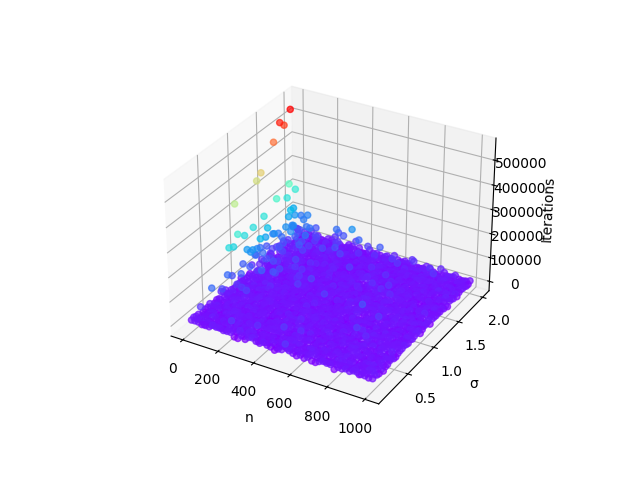

In [4]:
%matplotlib widget

dp = 50

ns = np.linspace(5, 1000, dp).astype(int)
sigmas = np.linspace(.1, 2, dp)
itrs = np.array([])

m = 3

k = 1000000
t = 0.000001
l = 0.0001

ns, sigmas = np.meshgrid(ns, sigmas, indexing='ij')

p = 0

for i in range(dp):
    for j in range(dp):
        itr = linear_regression(m, ns[i,j], sigmas[i,j], k, t, l)[3]
        itrs = np.append(itrs, itr)
        p += 1
        print(f"Progress: {p}/{dp**2}", end="\r")


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(ns.flatten(), sigmas.flatten(), itrs.flatten(), c=itrs, cmap='rainbow', alpha=0.7)
ax.set_xlabel('n')
ax.set_ylabel('σ')
ax.set_zlabel('Iterations')

plt.show()